#### **[데이터마이닝] Assignment 3: PCA & LDA/QDA**
**<font color='grey'> 2019 55718 | Melia Putri Handayani (멜리아 푸트리 한다야니)**

**라이브러리 'sklearn'을 이용하여 (Using the library 'Sklearn')**

1. 1988년 서울 올림픽 여자 7종 경기 (heptathlon) 데이터셋을 이용하여 주성분분석을 행하시오.
> (Conduct a principal analysis using the data set of the women's seven races (heptathlon) at the
1988 Seoul Olympics)

[REFERENCE](https://blog.naver.com/PostView.nhn?blogId=definitice&logNo=221310553075&parentCategoryNo=&categoryNo=41&viewDate=&isShowPopularPosts=false&from=postView)

2. 판별분석-2.pdf 10p에서 언급하는 Swiss Bank 데이터셋 (스위스은행지폐데이터.txt)을 사용하여 판별
분석하시오. 또한 랜덤 포레스트 (분류)를 실시하고 특성 중요도를 구하고 평가하시오.
> (Use the Swiss Bank dataset (Swiss Bank Paper Data.txt) mentioned in Discriminant Analysis-2.pdf 10p for discriminating analysis. Also, perform a random forest (classification), obtain, and
evaluate the importance of characteristics)
    * **class = 1: the genuine bank notes**
    * **class = 2: the counterfeit bank notes**

https://titanwolf.org/Network/Articles/Article?AID=84dd2f9f-7466-4fb8-921a-7fe7286bab46#gsc.tab=0

###**1. Heptathlon Dataset for PCA**

####**Data Preprocessing**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [41]:
url="https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HSAUR/heptathlon.csv"
df=pd.read_csv(url)
df

,Unnamed: 0,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
1,John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
2,Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
3,Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
4,Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540
5,Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411
6,Fleming (AUS),13.38,1.80,12.88,23.59,6.37,40.28,132.54,6351
7,Greiner (USA),13.55,1.80,14.13,24.48,6.47,38.00,133.65,6297
8,Lajbnerova (CZE),13.63,1.83,14.28,24.86,6.11,42.20,136.05,6252
9,Bouraga (URS),13.25,1.77,12.62,23.59,6.28,39.06,134.74,6252


In [42]:
#Change 'Unnamed: 0' to 'athelete'
df['athelete'] = df['Unnamed: 0']
df=df.drop('Unnamed: 0',axis=1)
df

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score,athelete
0,12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291,Joyner-Kersee (USA)
1,12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897,John (GDR)
2,13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858,Behmer (GDR)
3,13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540,Sablovskaite (URS)
4,13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540,Choubenkova (URS)
5,13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411,Schulz (GDR)
6,13.38,1.80,12.88,23.59,6.37,40.28,132.54,6351,Fleming (AUS)
7,13.55,1.80,14.13,24.48,6.47,38.00,133.65,6297,Greiner (USA)
8,13.63,1.83,14.28,24.86,6.11,42.20,136.05,6252,Lajbnerova (CZE)
9,13.25,1.77,12.62,23.59,6.28,39.06,134.74,6252,Bouraga (URS)


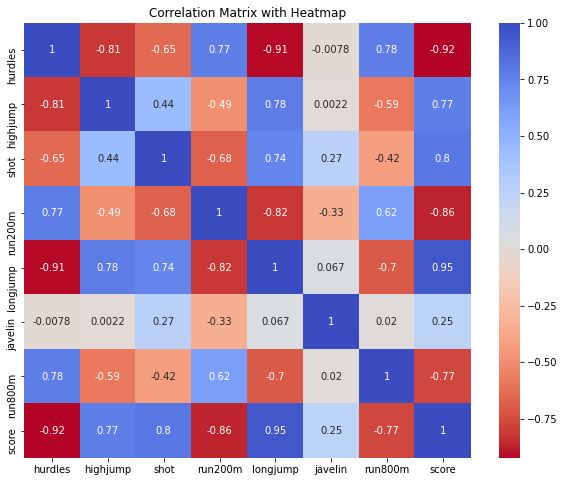

In [43]:
#Correlation Matrix
corr=df.corr()
plt.figure(figsize=(10,8),facecolor='w')
plt.title("Correlation Matrix with Heatmap")
sns.heatmap(corr,annot=True,cmap='coolwarm_r')
plt.show()

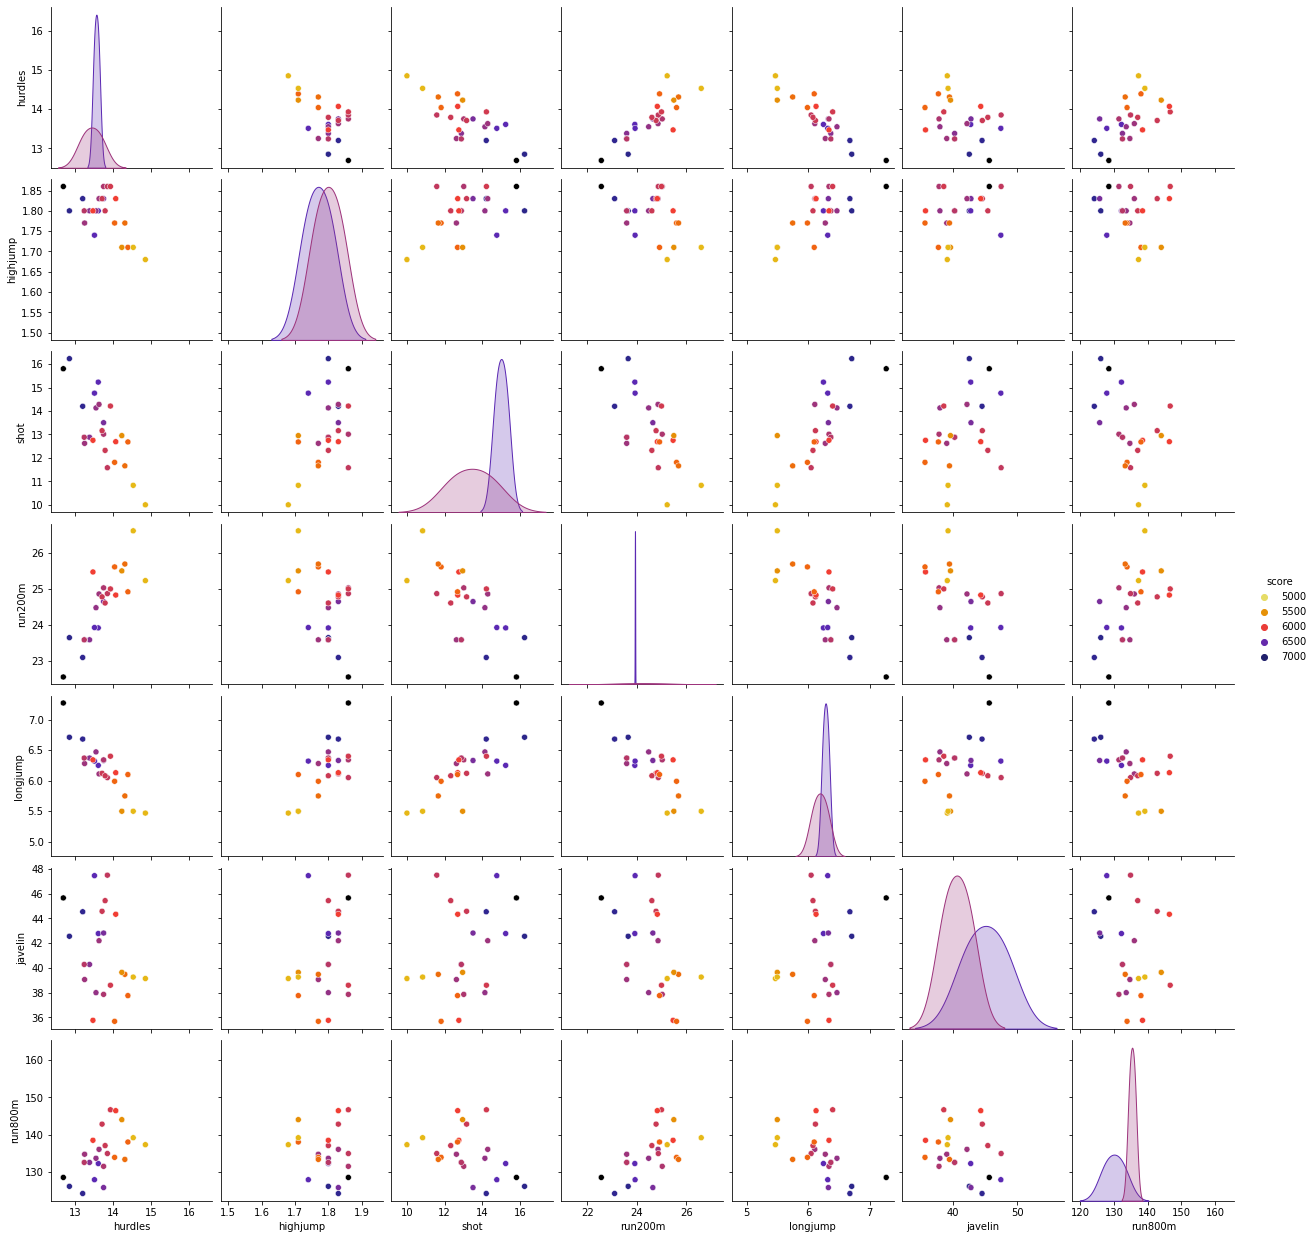

In [44]:
#Pairplot
plt.rcParams['figure.facecolor']='white'
sns.pairplot(df,hue='score',palette='CMRmap_r')

####**Principal Component Analysis**

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [46]:
X=df.iloc[:,:-1] 
y=df.iloc[:,-1] 

In [47]:
X=StandardScaler().fit_transform(X)
X=pd.DataFrame(X,columns=df.iloc[:,:-1].columns)
X

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,-1.593317,1.021376,1.835071,-2.199232,2.405348,1.202526,-0.928655,2.155177
1,-1.371639,0.235702,2.129240,-1.051825,1.200091,0.310188,-1.222861,1.447797
2,-0.886716,0.628539,0.740486,-1.630792,1.135524,0.880133,-1.459210,1.377777
3,-0.318663,0.235702,1.445125,-0.767605,0.210059,0.373515,-0.469498,0.806845
4,-0.457213,-0.549972,1.123591,-0.757078,0.360716,1.720658,-1.003745,0.806845
5,-0.124694,0.628539,0.261606,0.000842,0.382239,0.385030,-1.263483,0.575241
6,-0.637327,0.235702,-0.162546,-1.114985,0.468328,-0.346112,-0.432568,0.467518
7,-0.401793,0.235702,0.692598,-0.178111,0.683553,-1.002412,-0.295929,0.370567
8,-0.290954,0.628539,0.795215,0.221902,-0.091255,0.206562,-0.000492,0.289775
9,-0.817441,-0.157135,-0.340416,-1.114985,0.274626,-0.697290,-0.161751,0.289775


In [48]:
model=PCA(n_components=2)
pca=model.fit_transform(X)
pca

array([[-4.73644855,  1.22539333],
       [-3.28440666,  0.50281397],
       [-3.04070072,  0.66552951],
       [-1.59214658,  0.69947622],
       [-1.6187635 ,  1.7783728 ],
       [-1.20977434, -0.08669928],
       [-1.20996826, -0.34829112],
       [-1.0014033 , -0.83695433],
       [-0.61564151,  0.14577624],
       [-0.81676153, -0.55162879],
       [-0.58675246, -1.43042703],
       [-1.1512724 , -0.40509917],
       [-0.03088395,  0.82771529],
       [-0.01831843,  0.72956299],
       [ 0.06751278,  0.78163321],
       [-0.11797365, -0.55321949],
       [ 0.26570642, -1.77992363],
       [ 0.5625841 ,  0.74800208],
       [ 1.31010266, -0.63798124],
       [ 1.29504614, -1.87374132],
       [ 1.65452526, -0.92398335],
       [ 2.30639362, -0.07589554],
       [ 3.27988022, -0.64256494],
       [ 3.36476324, -0.93996824],
       [ 6.92470138,  2.98210183]])

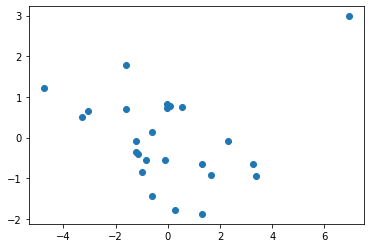

In [49]:
plt.scatter(pca[:,0],pca[:,1])

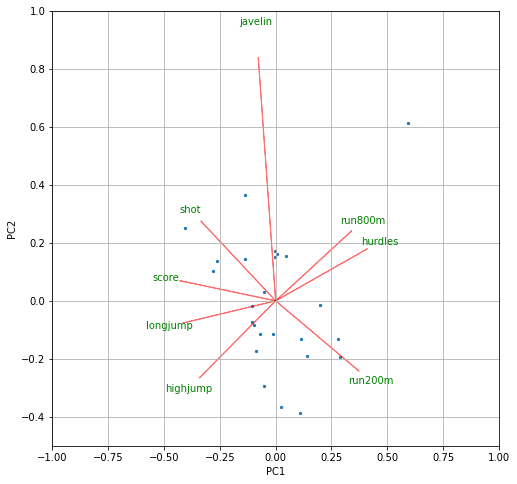

In [50]:
def biplot(score,coeff,labels=None):
    xs=score[:,0]
    ys=score[:,1]
    n=coeff.shape[0]
    scalex=1.0/(xs.max()-xs.min())
    scaley=1.0/(ys.max()-ys.min())
    plt.figure(figsize=(8,8),facecolor='w')
    plt.scatter(xs*scalex,ys*scaley,s=5)
    for i in range(n):
        plt.arrow(0,0,coeff[i,0],coeff[i,1],color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15,coeff[i,1]*1.15,"Var"+str(i+1),color='green',ha='center',va='center')
        else:
            plt.text(coeff[i,0]*1.15,coeff[i,1]*1.15,labels[i],color='g',ha='center',va='center')
 
    plt.xlim(-1,1)
    plt.ylim(-0.5,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

biplot(pca[:,0:2],np.transpose(model.components_[0:2, :]),X.columns)
plt.show()

###**2. 스위스은행지폐데이터 for Discriminant Analysis**


####**Data Preprocessing**

In [51]:
url_g="https://drive.google.com/uc?export=download&id=1vW8Ca0iB-VmuSLR49yFkgvn1gh4LBPDn"
swiss=pd.read_csv(url_g,sep='\t')
swiss

,Length,HeightLeft,HeightRight,InnerFrameLower,InnerFrameUppper,Diagonal,class
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1
...,...,...,...,...,...,...,...
195,215.0,130.4,130.3,9.9,12.1,139.6,2
196,215.1,130.3,129.9,10.3,11.5,139.7,2
197,214.8,130.3,130.4,10.6,11.1,140.0,2
198,214.7,130.7,130.8,11.2,11.2,139.4,2


####**Linear Discriminant Analysis**

In [52]:
#Import the Library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

In [53]:
#Define X and y
X=swiss.iloc[:,:-1]
y=swiss.iloc[:,-1]

In [54]:
#Split the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 6)
(100, 6)
(100,)
(100,)


In [55]:
lda=LDA()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [56]:
lda_pred=lda.predict(X_test)

In [57]:
#Confusion Matrix
conf_matrix=pd.crosstab(lda_pred,y_test,rownames=['Predicted'],colnames=['Actual'], margins=True)

tn=conf_matrix.iloc[0,0]
tp=conf_matrix.iloc[1,1]
fn=conf_matrix.iloc[0,1]
fp=conf_matrix.iloc[1,0]
all=conf_matrix.iloc[2,2]
accuracy=(tp+tn)/all
error_rate=(fp+fn)/all

conf_matrix_lda=conf_matrix
conf_matrix_lda

Actual,1,2,All
Predicted,,,
1,47,0,47
2,1,52,53
All,48,52,100


In [58]:
print("The Accuracy Score is: ",accuracy)
print("The Error Rate is: ",error_rate)

The Accuracy Score is:  0.99
The Error Rate is:  0.01


####**Quadratic Discriminant Analysis**

In [59]:
#Import the Library
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [60]:
qda=QDA()
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [61]:
qda_pred=qda.predict(X_test)

In [62]:
#Confusion Matrix
conf_matrix=pd.crosstab(qda_pred,y_test,rownames=['Predicted'],colnames=['Actual'], margins=True)

tn=conf_matrix.iloc[0,0]
tp=conf_matrix.iloc[1,1]
fn=conf_matrix.iloc[0,1]
fp=conf_matrix.iloc[1,0]
all=conf_matrix.iloc[2,2]
accuracy=(tp+tn)/all
error_rate=(fp+fn)/all

conf_matrix_qda=conf_matrix
conf_matrix_qda

Actual,1,2,All
Predicted,,,
1,47,0,47
2,1,52,53
All,48,52,100


In [63]:
print("The Accuracy Score is: ",accuracy)
print("The Error Rate is: ",error_rate)

The Accuracy Score is:  0.99
The Error Rate is:  0.01
